<a href="https://colab.research.google.com/github/andres-merino/AprendizajeAutomaticoInicial-05-N0105/blob/main/2-Notebooks/04-Mi-primer-modelo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<table style="border: none; border-collapse: collapse;">
    <tr>
        <td style="width: 20%; vertical-align: middle; padding-right: 10px;">
            <img src="https://i.imgur.com/nt7hloA.png" width="100">
        </td>
        <td style="width: 2px; text-align: center;">
            <font color="#0030A1" size="7">|</font><br>
            <font color="#0030A1" size="7">|</font>
        </td>
        <td>
            <p style="font-variant: small-caps;"><font color="#0030A1" size="5">
                <b>Escuela de Ciencias Físicas y Matemática</b>
            </font> </p>
            <p style="font-variant: small-caps;"><font color="#0030A1" size="4">
                Aprendizaje Automático Inicial &bull; Mi primer modelo
            </font></p>
            <p style="font-style: oblique;"><font color="#0030A1" size="3">
                Andrés Merino &bull; 2024-02
            </font></p>
        </td>  
    </tr>
</table>

---
## <font color='264CC7'> Introducción </font>

Este notebook está diseñado como una guía introductoria para el entrenamiento y evaluación de un modelo de regresión lineal utilizando datos simulados. Los objetivos principales son:

- Entrenar un modelo de regresión lineal.
- Evaluar el ajuste del modelo.


Los paquetes necesarios son:

In [101]:
# Paquetes necesarios
import numpy as np  # Para generación de datos y operaciones numéricas
import pandas as pd  # Para manejo de datos estructurados
import matplotlib.pyplot as plt  # Para visualización de datos
from sklearn.linear_model import LinearRegression  # Para el modelo de regresión lineal
from sklearn.metrics import mean_squared_error, r2_score  # Para evaluación del modelo
from sklearn.model_selection import train_test_split

---
## <font color='264CC7'> Datos </font>


Utilicemos datos ficticios:

In [102]:
# Datos proporcionados
x = [5, 7, 8, 9, 2, 17, 3, 10, 4, 11, 12, 16, 6]
y = [99, 86, 87, 88, 90, 86, 80, 87, 94, 78, 77, 85, 86]

# Crear un DataFrame
df = pd.DataFrame({
    'x': x,
    'y': y
})

# Mostrar los datos
display(df)

,x,y
0,5,99
1,7,86
2,8,87
3,9,88
4,2,90
5,17,86
6,3,80
7,10,87
8,4,94
9,11,78


Grafiquemos su dispersión:

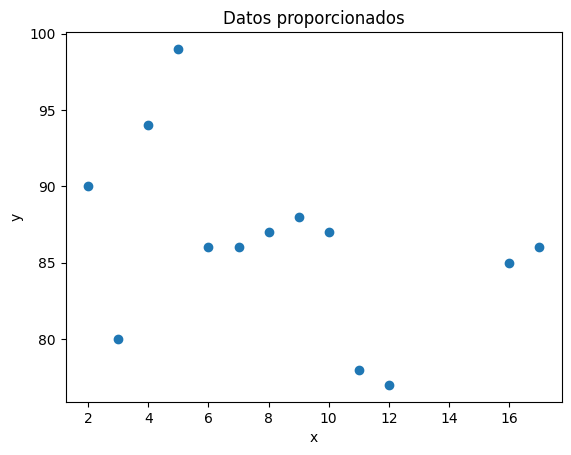

In [103]:
# Gráfico de dispersión de df
plt.scatter(df['x'], df['y'])
plt.xlabel('x')
plt.ylabel('y')
plt.title('Datos proporcionados')
plt.show()


---
## <font color='264CC7'> Características y etiquetas </font>

Ahora, separamos las características y las etiquetas.

In [104]:
# Dividir el conjunto de datos en características y etiquetas
features = ['x']
X = df.loc[:, features]
y = df.loc[:, ['y']]

---
## <font color='264CC7'> Conjunto de entrenamiento y prueba </font>

Con esto, dividimos los datos en dos conjuntos: uno para entrenamiento y otro para prueba.

In [105]:
# Dividir datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Ahora, visualizamos el tamaño de los conjuntos de entrenamiento y prueba.

In [106]:
# Reviso las dimensiones de los conjuntos de datos
print('Dimensiones de los conjuntos de datos:')
print('X_train:', X_train.shape)
print('y_train:', y_train.shape)
print('X_test:', X_test.shape)
print('y_test:', y_test.shape)

Dimensiones de los conjuntos de datos:
X_train: (10, 1)
y_train: (10, 1)
X_test: (3, 1)
y_test: (3, 1)


---
## <font color='264CC7'> Entrenamiento </font>

Definimos un modelo de regresión lineal y lo entrenamos con los datos de entrenamiento.

In [107]:
# Crear el modelo y ajustarlo
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# Visualizar los coeficientes
print('Ecuación de la recta:')
print('y =', modelo.coef_[0][0], 'x +', modelo.intercept_[0])


Ecuación de la recta:
y = -1.0097817908201654 x + 95.78705793829947


Visualizamos el modelo entrenado.

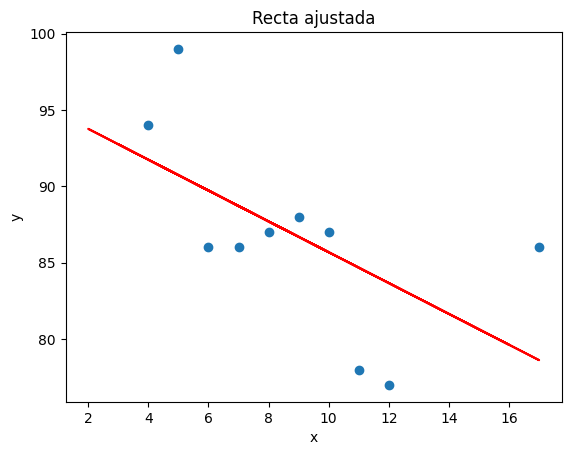

In [108]:
# Graficar la recta
plt.scatter(X_train, y_train)
plt.plot(X, modelo.coef_[0][0] * X + modelo.intercept_[0], 'r')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Recta ajustada')
plt.show()


---
## <font color='264CC7'> Evaluacion </font>

Realizamos predicciones con el conjunto de prueba y evaluamos el modelo.

In [109]:
# Predicciones del modelo
y_pred = modelo.predict(X_test)

# Comparar las predicciones con los datos de prueba
df_predicciones = pd.DataFrame({
    'Actual': y_test.values.flatten(),
    'Predicción': y_pred.flatten()
})
display(df_predicciones)

,Actual,Predicción
0,80,92.757713
1,85,79.630549
2,90,93.767494


Veamos en un gráfico cómo se comparan las predicciones con las etiquetas reales.

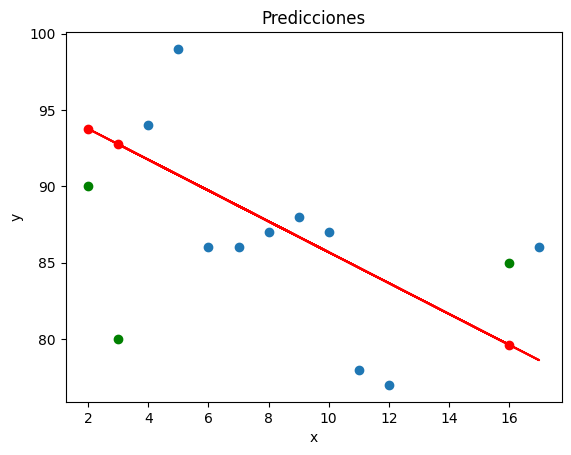

In [110]:
# Graficar las predicciones
plt.scatter(X_train, y_train)
plt.scatter(X_test, y_test, color='g')
plt.scatter(X_test, y_pred, color='r')
plt.plot(X, modelo.coef_[0][0] * X + modelo.intercept_[0], 'r')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Predicciones')
plt.show()


Calculamos el error cuadrático medio.

In [111]:
# Métricas de evaluación
mse = mean_squared_error(y_test, y_pred)

print('Error cuadrático medio:', mse)

Error cuadrático medio: 68.59474820631307
